In [1]:
import pandas as pd
import numpy as np
import cv2
import requests

from PIL import Image, ImageStat
from os.path import exists

In [2]:
def run_query(query):
    response = requests.post('https://api.tarkov.dev/graphql', json={'query': query})
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception("Query failed to run by returning code of {}. {}".format(response.status_code, query))

In [3]:
# paths
path_icons = './icons/'
path_grid_icons = './grid_icons/'
path_data = './data/'

filename_ending_grid_icon = '-grid-image.jpg'

In [4]:
# get all icons from API
icons = []
icons.append(np.asarray(Image.open(path_icons + '5447ac644bdc2d6c208b4567-icon.jpg')))
icons.append(np.asarray(Image.open(path_icons + '54527ac44bdc2d36668b4567-icon.jpg')))

get_all_items = """
{
    items {
        id
        gridImageLink
    }
}
"""
# query_result = run_query(get_all_items)['data']['items']


In [6]:
# query_result[0]

In [7]:
# download all icons
## Importing Necessary Modules
# import requests # to get image from the web
# import shutil # to save it locally

## Set up the image URL and filename
# for i in query_result:
#     item_id = i['id']
#     image_url = i['gridImageLink']
#     filename = image_url.split("/")[-1]

#     # Open the url image, set stream to True, this will return the stream content.
#     r = requests.get(image_url, stream = True)

#     # Check if the image was retrieved successfully
#     if r.status_code == 200:
#         # Set decode_content value to True, otherwise the downloaded image file's size will be zero.
#         r.raw.decode_content = True

#         # Open a local file with wb ( write binary ) permission.
#         with open(filename,'wb') as f:
#             shutil.copyfileobj(r.raw, f)

#         print('Image sucessfully Downloaded: ',filename)
#     else:
#         print('Image Couldn\'t be retreived')

In [9]:
# item['id']

In [10]:
# get image data
## load dataframe from csv
all_items_df = pd.read_csv(path_data + 'all_items.csv')

In [11]:
## read icons from disk
icons = []
for index,item in all_items_df.iterrows():
    filename = path_grid_icons + item['id'] + filename_ending_grid_icon
    if exists(filename):
        icons.append(np.asarray(Image.open(filename)))
    else:
        icons.append([])
        print(f"File {filename} does not exist.")

File ./grid_icons/5737300424597769942d5a01-grid-image.jpg does not exist.
File ./grid_icons/5a327f7286f7747668661419-grid-image.jpg does not exist.
File ./grid_icons/5a327f7c86f77475187e509a-grid-image.jpg does not exist.
File ./grid_icons/5a327f9086f77475187e50a9-grid-image.jpg does not exist.
File ./grid_icons/5a43a85186f7746c914b947a-grid-image.jpg does not exist.
File ./grid_icons/5a43a86d86f7746c9d7395e8-grid-image.jpg does not exist.
File ./grid_icons/5ba3a14cd4351e003202017f-grid-image.jpg does not exist.
File ./grid_icons/5ba3a449d4351e0034778243-grid-image.jpg does not exist.
File ./grid_icons/5ba3a4d1d4351e4502010622-grid-image.jpg does not exist.
File ./grid_icons/5ba3a53dd4351e3bac12056e-grid-image.jpg does not exist.
File ./grid_icons/5c0c202e86f77448687e0368-grid-image.jpg does not exist.
File ./grid_icons/5c123fe086f7742a60324263-grid-image.jpg does not exist.
File ./grid_icons/5ebbfe23ba87a5065a00a563-grid-image.jpg does not exist.
File ./grid_icons/5ebbff0841a637322117

In [12]:
# all_items_df.iloc[2655]

In [13]:
i = 2500
if len(icons[i]) == 0:
    print("list is empty")

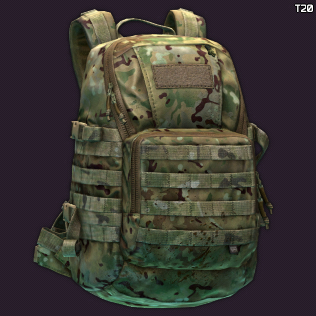

In [14]:
Image.fromarray(icons[i])

In [15]:
print(icons[i].shape)

(316, 316, 3)


In [56]:
divider = 2
all_features_df = pd.DataFrame(columns=[], index=range(len(all_items_df)))
all_features_df['id'] = all_items_df['id']
for i in range(divider**2):
    all_features_df[str(i)] = 0
all_features_df

,id,0,1,2,3
0,5447a9cd4bdc2dbd208b4567,0,0,0,0
1,5447ac644bdc2d6c208b4567,0,0,0,0
2,5448ba0b4bdc2d02308b456c,0,0,0,0
3,5448bd6b4bdc2dfc2f8b4569,0,0,0,0
4,5448be9a4bdc2dfd2f8b456a,0,0,0,0
...,...,...,...,...,...
2718,62a61c988ec41a51b34758d5,0,0,0,0
2719,62a9cb937377a65d7b070cef,0,0,0,0
2720,customdogtags12345678910,0,0,0,0
2721,glock17ps900000000000001,0,0,0,0


In [69]:
all_items_df['features'] = all_items_df['features'].astype('object')
divider = 2
all_features_df = pd.DataFrame(columns=[], index=range(len(all_items_df)))
all_features_df['id'] = all_items_df['id']
for i in range(divider**2):
    all_features_df[str(i) + 'r'] = 0
    all_features_df[str(i) + 'g'] = 0
    all_features_df[str(i) + 'b'] = 0

icons_avg = []
for index in range(len(icons)):
    # no icon
    if len(icons[index]) == 0:
        continue
    
    item = all_items_df.iloc[index]
    nr_slot_x = item['width']
    nr_slot_y = item['height']
    icon_width = icons[index].shape[1]
    icon_height = icons[index].shape[0]
    
    # bigger than 1 slot
    if nr_slot_x > 1 or nr_slot_y > 1:
        all_items_df.at[index, 'features'] = []
        continue
    
#     if nr_slot_x != nr_slot_y:
#         tmp_a = icon_width
#         tmp_b = icon_height
#         if nr_slot_x > nr_slot_y:
#             icon_width = max(tmp_a, tmp_b)
#             icon_height = min(tmp_a, tmp_b)
#         else:
#             icon_width = min(tmp_a, tmp_b)
#             icon_height = max(tmp_a, tmp_b)
            
    slot_width = (int) (icon_width / nr_slot_x)
    slot_height = (int) (icon_height / nr_slot_y)
    
#     print(index, nr_slot_x, nr_slot_y, slot_width, slot_height)
    
    r = 0
    g = 0
    b = 0
    
    all_items_df.loc[index, 'icon_width'] = slot_width
    all_items_df.loc[index, 'icon_height'] = slot_height
    
    icon_full = icons[index]
    
    features = []
    part_width = (int) (slot_width / divider)
    part_height = (int) (slot_height / divider)
    for i in range(nr_slot_x):
        for j in range (nr_slot_y):
            icon = icon_full[j*slot_height:(j+1)*slot_height, i*slot_width:(i+1)*slot_width]
            for m in range(divider):
                for n in range(divider):
                    icon_part = icon[n*part_height:(n+1)*part_height, m*part_width:(m+1)*part_width]
                    for x in range((int) (part_width)):
                        for y in range((int) (part_height)):
                            r += (icon_part[y][x])[0]
                            g += (icon_part[y][x])[1]
                            b += (icon_part[y][x])[2]
                    r = (int) (r / (part_width*part_height))
                    g = (int) (g / (part_width*part_height))
                    b = (int) (b / (part_width*part_height))
                    all_features_df.loc[index, str(m*(divider)+n) + 'r'] = r
                    all_features_df.loc[index, str(m*(divider)+n) + 'g'] = g
                    all_features_df.loc[index, str(m*(divider)+n) + 'b'] = b

In [70]:
all_features_df

,id,0r,0g,0b,1r,1g,1b,2r,2g,2b,3r,3g,3b
0,5447a9cd4bdc2dbd208b4567,22,24,24,18,19,18,31,33,33,23,25,25
1,5447ac644bdc2d6c208b4567,88,90,78,72,77,62,85,87,76,63,68,53
2,5448ba0b4bdc2d02308b456c,47,38,49,54,49,59,89,91,96,42,32,44
3,5448bd6b4bdc2dfc2f8b4569,0,0,0,0,0,0,0,0,0,0,0,0
4,5448be9a4bdc2dfd2f8b456a,34,36,34,29,34,30,55,57,57,27,29,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2718,62a61c988ec41a51b34758d5,0,0,0,0,0,0,0,0,0,0,0,0
2719,62a9cb937377a65d7b070cef,40,49,57,46,56,64,85,96,100,32,42,51
2720,customdogtags12345678910,37,47,53,30,41,49,78,84,89,102,108,113
2721,glock17ps900000000000001,0,0,0,0,0,0,0,0,0,0,0,0


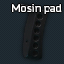

In [35]:
Image.fromarray(icons[1213])

In [36]:
all_items_df.iloc[1213]

name                Mosin Rifle AIM Sports Recoil Pad
id                           5bbde409d4351e003562b036
width                                               1
height                                              1
icon_width                                       64.0
icon_height                                      64.0
features                               [(36, 44, 49)]
fleaMarket                                    24000.0
flea_avg48                                      39541
flea_ch48percent                                34.53
prapor                                            NaN
therapist                                         NaN
fence                                          1555.0
skier                                             NaN
peacekeeper                                      18.0
mechanic                                       2177.0
ragman                                            NaN
jaeger                                            NaN
Name: 1213, dtype: object

In [23]:
# save dataframe as csv
all_items_df.to_csv(path_data + 'all_items.csv', index=False)

In [24]:
all_items_df.iloc[3]

name                Makarov PM 9x18PM pistol
id                  5448bd6b4bdc2dfc2f8b4569
width                                      2
height                                     1
icon_width                              63.0
icon_height                             64.0
features                                  []
fleaMarket                            6000.0
flea_avg48                              8814
flea_ch48percent                       11.72
prapor                                2548.0
therapist                                NaN
fence                                 2038.0
skier                                    NaN
peacekeeper                             23.0
mechanic                              2854.0
ragman                                   NaN
jaeger                                   NaN
Name: 3, dtype: object

In [88]:
sigma = 5 # uncertainty of the mean value for voting

feature_dicts = []
for i in range(divider**2):
    for c in range(3):
        l = []
        for j in range(256):
            l.append([])
        feature_dicts.append(l)

In [89]:
all_features_df.iloc[100]

id    5649aa744bdc2ded0b8b457e
0r                          53
0g                          61
0b                          66
1r                          44
1g                          53
1b                          58
2r                          58
2g                          63
2b                          66
3r                          28
3g                          38
3b                          45
Name: 100, dtype: object

In [90]:
# add icon features to feature list
for index,item in all_features_df.iterrows():
    # continue if item has no features
    if item.loc['0r'] == 0:
        continue
    for i in range(len(feature_dicts)):
        for s in range(-sigma,sigma,1):
            if item[i+1]+s < 0 or item[i+1]+s > 255:
                continue
            feature_dicts[i][item[i+1]+s].append(index)

In [91]:
feature_dicts

[[[],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [523, 2404, 2412],
  [0, 523, 1741, 2404, 2412],
  [0, 523, 1208, 1741, 1766, 1882, 1901, 2023, 2404, 2412],
  [0, 523, 1208, 1741, 1766, 1882, 1901, 2023, 2360, 2404, 2412],
  [0,
   60,
   104,
   523,
   1208,
   1741,
   1766,
   1882,
   1901,
   2023,
   2360,
   2404,
   2412,
   2417],
  [0,
   60,
   104,
   364,
   523,
   559,
   788,
   1043,
   1208,
   1335,
   1741,
   1743,
   1766,
   1882,
   1901,
   2023,
   2159,
   2360,
   2404,
   2412,
   2417],
  [0,
   60,
   61,
   104,
   342,
   364,
   430,
   433,
   523,
   559,
   663,
   788,
   1043,
   1208,
   1252,
   1335,
   1428,
   1741,
   1743,
   1766,
   1862,
   1882,
   1901,
   2023,
   2159,
   2234,
   2360,
   2404,
   2412,
   2417],
  [0,
   60,
   61,
   104,
   342,
   364,
   430,
   433,
   518,
   523,
   559,
   663,
   788,
   1043,
   1208,
   1252,
   1335,
   1428,
   1741,
   1743,
   1766,


In [96]:
feature_dicts_df = pd.DataFrame({'features': feature_dicts[0]})
feature_dicts_df.loc[100]

features    [191, 210, 239, 241, 242, 243, 244, 246, 248, ...
Name: 100, dtype: object

In [97]:
# save dataframes as csv
for i in range(divider**2 * 3):
    feature_dict_df = pd.DataFrame({'features': feature_dicts[i]})
    feature_dict_df.to_csv(path_data + 'feature_' + str(i) + '_r_sigma_' + str(sigma) + '.csv')